In [34]:
# Import important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
%matplotlib inline

In [35]:
# Load Training and Test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

print(train_data.shape)
print(test_data.shape)
print(sample_submission.shape)

(287836, 15)
(47860, 14)
(47860, 1)


In [36]:
# Show First Five records of training data
train_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


OGC: Organization Group Code - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

OG: Organization Group names

DC: Department Code - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.

Dept: Department name

UC: Union Code - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

Union: Union names

JF: Job Family - Job Family combines similar Jobs into meaningful groups.

Job: Job name

EI: Employee Identifier

Salaries: Salary of the employee

Overtime: Amounts paid to City employees working in excess of 40 hours per week. 

H/D: Health/Dental - City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. 

YT: Year Type - Fiscal (July through June) or Calendar (January through December)

Total_Compensation: The final compensation i.e. the sum of all salaries and benefits paid to City employees.

 

In [37]:
# NUll Values in Training data
train_data_null_values = train_data.isnull().sum()
pd.DataFrame({"Null_Values":train_data_null_values,'Percentage':np.round(
    (100*train_data_null_values)/len(train_data),4)}).sort_values(by='Null_Values', ascending=False).head(2)

,Null_Values,Percentage
JF,38,0.0132
Union,36,0.0125


In [38]:
# NUll Values in Test data
test_data_null_values = test_data.isnull().sum()
pd.DataFrame({"Null_Values":test_data_null_values,'Percentage':np.round(
    (100*test_data_null_values)/len(test_data),4)}).sort_values(by='Null_Values', ascending=False).head(2)

,Null_Values,Percentage
Union,7,0.0146
JF,7,0.0146


In [39]:
# Fill Null Values in Union Column as per mode value of UC
dict_1 = dict(train_data.groupby('UC')['Union'].apply(lambda x : x.mode()[0]))
train_data['Union'] = train_data['Union'].fillna(train_data['UC'].apply(lambda x : dict_1.get(x)))
test_data['Union'] = test_data['Union'].fillna(test_data['UC'].apply(lambda x : dict_1.get(x)))

In [40]:
# Checking Null values in column JF belongs to which union (Training set)
train_data[train_data['JF'].isnull()].sort_values(by ='Union').head(5)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
276233,2016,6,General Administration & Finance,RET,Retirement System,351,Municipal Exec Assoc-Misc,NaN,Managing Director,46922,98099,0,4938.21,Fiscal,135408
52028,2016,6,General Administration & Finance,RET,Retirement System,351,Municipal Exec Assoc-Misc,NaN,Managing Director,11707,117917,0,5935.83,Fiscal,156505
4145,2016,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,13880,28416,0,3940.59,Fiscal,42123
139945,2016,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,17682,25179,5260,3491.67,Fiscal,44012
153481,2016,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,8757,28416,1430,3940.59,Fiscal,44452


In [41]:
# Checking Null values in column JF belongs to which union (Test set)
test_data[test_data['JF'].isnull()].sort_values(by ='Union')

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT
5878,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",NaN,Recreation Facility Assistant,12995,5258,0,1951.59,Fiscal
12913,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",NaN,Recreation Facility Assistant,44047,672,0,249.40,Fiscal
21280,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",NaN,Recreation Facility Assistant,31790,1159,0,430.22,Fiscal
22043,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",NaN,Recreation Facility Assistant,29821,1394,0,517.51,Fiscal
37827,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",NaN,Recreation Facility Assistant,39471,5392,0,2001.47,Fiscal
38669,2016,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",NaN,Recreation Facility Assistant,31034,3897,0,1446.55,Fiscal
44312,2016,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,36464,32013,5983,4439.40,Fiscal


**Most of the null records in JF columns are from Union Code 351 and 790**

In [42]:
# Value Counts of JF column where Union Code = 351
train_data[train_data['UC']==351]['JF'].value_counts().head(5)

Management                       7050
Street Transit                    979
Administrative & Mgmt (Unrep)      25
Correction & Detention             22
Probation & Parole                 17
Name: JF, dtype: int64

In [43]:
# Value Counts of JF column where Union Code = 790
train_data[train_data['UC']==790]['JF'].value_counts().head(5)

Clerical, Secretarial & Steno    11842
Public Service Aide               9132
Recreation                        8142
Protection & Apprehension         7804
Housekeeping & Laundry            6296
Name: JF, dtype: int64

In [44]:
# Filling NA values in JF Column
def myfunction(x):
    if x['JF'] == 'NULL':
        if x['Job'] == 'Managing Director':
            return 'Management'
        elif x['Job'] == 'Transportation Controller Trainee':
            return 'Public Service Aide'
        elif (x['Job'] == 'Recreation Facility Assistant'):
            return 'Recreation'
    else :
        return x['JF']
    
train_data['JF'] = train_data['JF'].fillna(value='NULL')
train_data['JF'] = train_data.apply(lambda x : myfunction(x), axis=1)

test_data['JF'] = test_data['JF'].fillna(value='NULL')
test_data['JF'] = test_data.apply(lambda x : myfunction(x), axis=1)

In [45]:
# Drop Columns where codes are given
train_data.drop(columns = ['OGC','DC','UC','EI','YT'], axis=1, inplace=True)
test_data.drop(columns = ['OGC','DC','UC','EI','YT'], axis=1, inplace=True)

In [46]:
# Types of column
categorical_column = ['OG','Dept','Union','JF','Job']
numerical_column = ['Salaries','Overtime','H/D']
target_column = 'Total_Compensation'

In [47]:
train_data[target_column].describe()

count    287836.000000
mean      97990.329882
std       67750.020573
min      -74082.000000
25%       35977.000000
50%       98033.000000
75%      142138.250000
max      653498.000000
Name: Total_Compensation, dtype: float64

We have given Negative values given as total compensation. So Convert these negative values into positive values

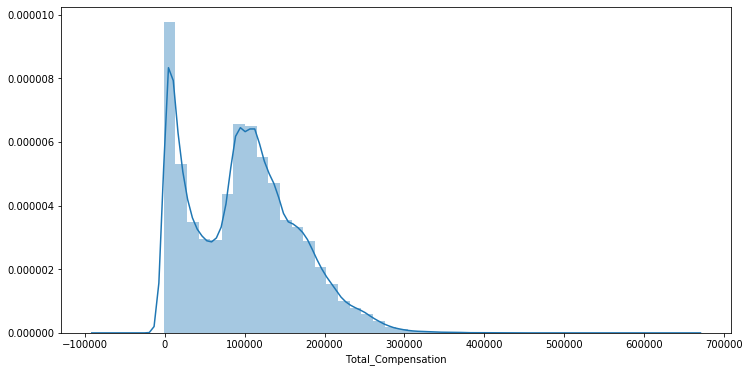

In [48]:
plt.figure(figsize = (12,6))
sns.distplot(train_data[target_column])
plt.show()

In [49]:
# First Five records of Negative values of Target Column (Sorted by ascending)
train_data[train_data[target_column]<0].sort_values(by=target_column,ascending=True).head()

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
93572,2014,Public Protection,Fire Department,Members of Boards and Commissions,Management,"Bdcomm Mbr, Grp5,M$100/Mo",-68771,0,17.98,-74082
31219,2013,Human Welfare & Neighborhood Development,Human Rights Commission,"SEIU - Miscellaneous, Local 1021",Human Services,"Rep, Human Rights Comm",-17635,0,-2940.47,-24362
85312,2015,Community Health,Public Health,"Prof & Tech Engineers - Miscellaneous, Local 21",Hospital Administration,Health Care Analyst,-7423,0,-1245.26,-10846
41820,2014,Community Health,Public Health,"SEIU - Staff and Per Diem Nurses, Local 1021",Nursing,Nurse Practitioner,12329,0,0.00,-8965
224110,2016,"Public Works, Transportation & Commerce",Municipal Transportation Agency,"Teamsters - Miscellaneous, Local 856",Skilled Labor,Parking Meter Repairer,-4770,0,-847.97,-6930


In [50]:
# Last Five records of Negative values of Target Column (Sorted by ascending)
train_data[train_data[target_column]<0].sort_values(by=target_column,ascending=True).tail()

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
286061,2016,"Public Works, Transportation & Commerce",Municipal Transportation Agency,Municipal Executive Association - Miscellaneous,Street Transit,"Manager VI, MTA",0,0,0.0,-1
246435,2015,Culture & Recreation,Recreation and Park Commission,"Laborers, Local 261",Agriculture & Horticulture,Apprentice Gardener,0,0,0.0,-1
204909,2015,General Administration & Finance,City Attorney,Municipal Attorneys' Association,Legal & Court,Chief Atty1 (Civil & Criminal),0,0,0.0,-1
159910,2015,"Public Works, Transportation & Commerce",Municipal Transportation Agency,"Prof & Tech Engineers - Miscellaneous, Local 21",Professional Engineering,Engineer,0,0,0.0,-1
271077,2015,Human Welfare & Neighborhood Development,Environment,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Publ Svc Aide-Asst To Prof,0,0,0.0,-1


In [51]:
# Records where value in target column is given as zero
train_data[train_data[target_column]==0].sort_values(by=target_column,ascending=True)

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
50747,2015,Public Protection,Juvenile Probation,"Stationary Engineers, Local 39",Journeyman Trade,Senior Stationary Engineer,0,0,0.00,0
51787,2015,"Public Works, Transportation & Commerce",Municipal Transportation Agency,"Prof & Tech Engineers - Miscellaneous, Local 21","Payroll, Billing & Accounting",Accountant III,0,0,0.00,0
62011,2015,General Administration & Finance,Treasurer/Tax Collector,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Senior,0,0,0.00,0
69331,2015,Community Health,Public Health,"Prof & Tech Engineers - Miscellaneous, Local 21","Payroll, Billing & Accounting",Accountant Intern,0,0,0.00,0
80174,2015,Public Protection,Department of Emergency Management,Municipal Executive Association - Miscellaneous,Management,Manager I,0,0,0.00,0
87239,2013,Public Protection,Police,Police Officers' Association,Police Services,Police Officer 3,0,0,7.59,0
97099,2013,"Public Works, Transportation & Commerce",General Services Agency - Public Works,"SEIU - Miscellaneous, Local 1021",Public Service Aide,PS Aide To Prof,0,0,0.00,0
103825,2015,Public Protection,Juvenile Probation,"Stationary Engineers, Local 39",Journeyman Trade,Senior Stationary Engineer,0,0,0.00,0
112854,2016,"Public Works, Transportation & Commerce",Municipal Transportation Agency,"Prof & Tech Engineers - Miscellaneous, Local 21",Professional Engineering,Engineer,0,0,0.00,0
120396,2014,General Administration & Finance,General Services Agency - City Admin,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Junior Management Assistant,0,0,0.12,0


In [52]:
# Convert Negative Values into Positive values and drop columns that represents 0 in Total_Compensation column
train_data[target_column] = np.abs(train_data[target_column])
train_data.drop(train_data[train_data[target_column]==0].index,axis=0, inplace=True)

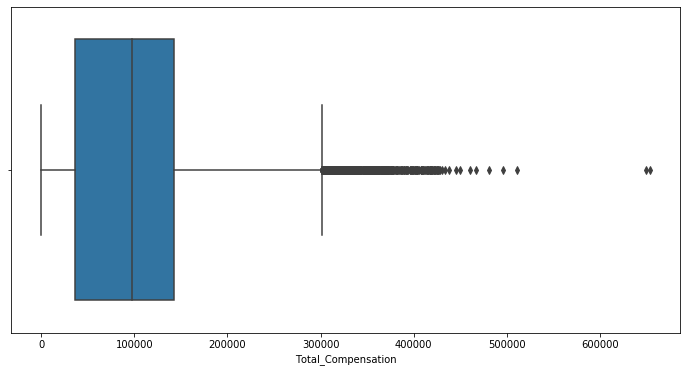

In [53]:
# Target column box plot
plt.figure(figsize = (12,6))
sns.boxplot(train_data[target_column])
plt.show()

In [54]:
# Records that have value more than 600000 in target column
train_data[train_data[target_column]>600000]

,Year,OG,Dept,Union,JF,Job,Salaries,Overtime,H/D,Total_Compensation
2017,2015,General Administration & Finance,Retirement System,Municipal Executive Association - Miscellaneous,Administrative & Mgmt (Unrep),Chief Investment Officer,507831,0,12424.5,648875
275386,2016,General Administration & Finance,Retirement System,Municipal Executive Association - Miscellaneous,Administrative & Mgmt (Unrep),Chief Investment Officer,515101,0,13068.8,653498


In [55]:
# Drop that record where target column have value more than 600000
train_data.drop(train_data[train_data[target_column]>600000].index, axis=0, inplace=True)

In [56]:
train_data[numerical_column].describe()

,Salaries,Overtime,H/D
count,287820.000000,287820.000000,287820.000000
mean,63262.675863,4401.281770,8933.284442
std,44622.078070,11079.397097,4893.801158
min,-68771.000000,-12308.000000,-2940.470000
25%,23414.000000,0.000000,4358.820000
50%,62506.500000,0.000000,11982.676260
75%,93004.500000,2738.000000,12801.790000
max,379201.000000,227313.000000,21872.800000


In [57]:
# Converting Negative values into positive in all the numerical columns
train_data['Salaries'] = np.abs(train_data['Salaries'])
train_data['Overtime'] = np.abs(train_data['Overtime'])
train_data['H/D'] = np.abs(train_data['H/D'])

test_data['Salaries'] = np.abs(test_data['Salaries'])
test_data['Overtime'] = np.abs(test_data['Overtime'])
test_data['H/D'] = np.abs(test_data['H/D'])

In [58]:
print("No. of records where Salary is given as 0 :",len(train_data[train_data['Salaries']==0]))
print("No. of records where Overtime is given as 0 :",len(train_data[train_data['Overtime']==0]))
print("No. of records where Insurance is given as 0 :",len(train_data[train_data['H/D']==0]))
print("No. of records where Salary,Overtime,Insurance is given as 0 :",len(train_data[(train_data['Salaries']==0) & (train_data['Overtime']==0) & (train_data['H/D']==0)]))

No. of records where Salary is given as 0 : 3340
No. of records where Overtime is given as 0 : 162844
No. of records where Insurance is given as 0 : 13349
No. of records where Salary,Overtime,Insurance is given as 0 : 2277


In [59]:
train_data.corr()

,Year,Salaries,Overtime,H/D,Total_Compensation
Year,1.000000,0.004281,0.015026,-0.013727,0.005911
Salaries,0.004281,1.000000,0.271690,0.775069,0.972579
Overtime,0.015026,0.271690,1.000000,0.312466,0.453629
H/D,-0.013727,0.775069,0.312466,1.000000,0.806397
Total_Compensation,0.005911,0.972579,0.453629,0.806397,1.000000


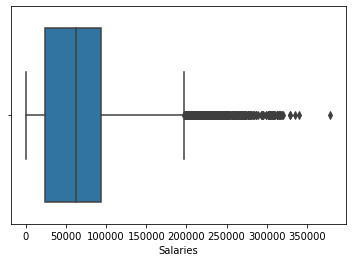

In [60]:
# Removing Outliers from Salaries column
sns.boxplot(train_data['Salaries'])
train_data.drop(train_data[train_data['Salaries']>350000].index, inplace = True, axis=0)

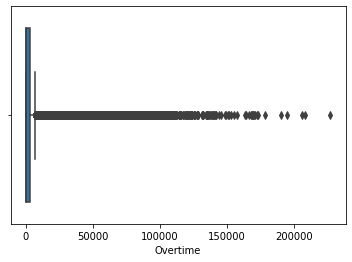

In [61]:
# Removing Outliers from Overtime column
sns.boxplot(train_data['Overtime'])
train_data.drop(train_data[train_data['Overtime']>200000].index, inplace = True, axis=0)

In [62]:
# create csv file for clean data
train_data.to_csv('Clean_data_train.csv', index= False)
test_data.to_csv('Clean_data_test.csv', index= False)